In [93]:
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
df= pd.read_csv("Dataset_de_200_Comunidades_para_Analise_Ambiental2.csv")

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
df.columns

Index(['Comunidade', 'Município', 'Estado', 'Índice de Desmatamento (%)',
       'Acesso à Água Potável (%)', 'Cobertura Vegetal (%)',
       'Renda Média Mensal (R$)', 'Densidade Populacional (hab/km²)',
       'Frequência de Queimadas (ano)', 'Distância de Área Urbana (km)',
       'Presença de Escola (Sim/Não)',
       'Presença de Unidade de Saúde (Sim/Não)', 'Latitude', 'Longitude'],
      dtype='object')

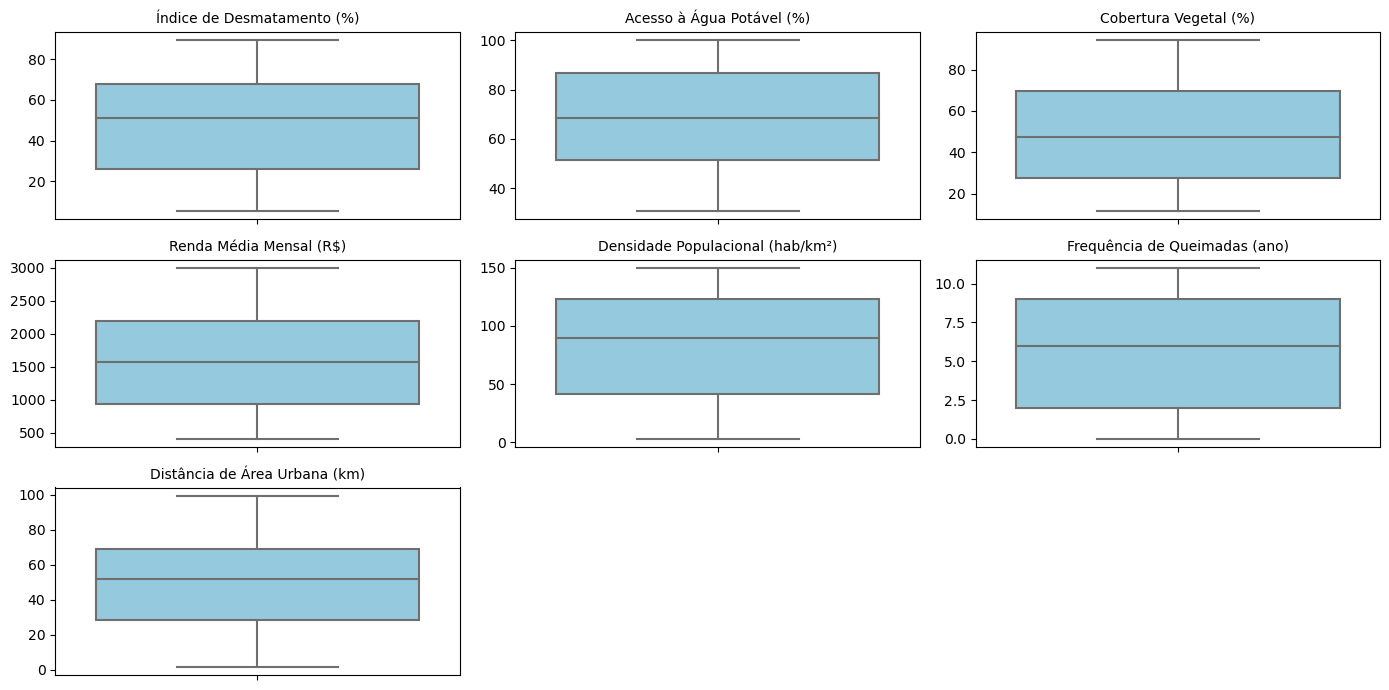

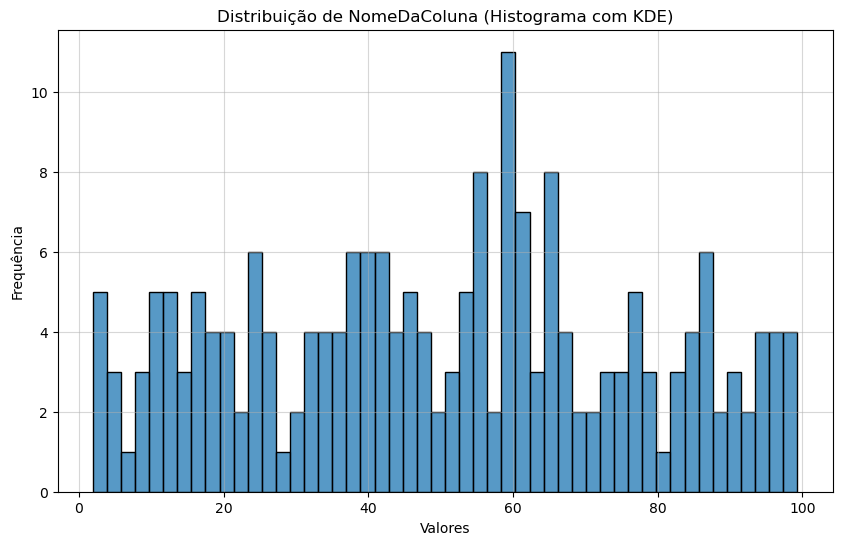

In [3]:
df[['Índice de Desmatamento (%)', 'Acesso à Água Potável (%)','Cobertura Vegetal (%)','Renda Média Mensal (R$)','Densidade Populacional (hab/km²)',	
    'Frequência de Queimadas (ano)','Distância de Área Urbana (km)']].describe()

variaveis = [
    'Índice de Desmatamento (%)', 
    'Acesso à Água Potável (%)',
    'Cobertura Vegetal (%)',
    'Renda Média Mensal (R$)',
    'Densidade Populacional (hab/km²)',	
    'Frequência de Queimadas (ano)',
    'Distância de Área Urbana (km)'
]


plt.figure(figsize=(14, 7))

for i, var in enumerate(variaveis):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, y=var, color='skyblue')
    plt.title(var, fontsize=10)
    plt.ylabel('')

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
#sns.histplot(df['Índice de Desmatamento (%)'], bins=20, kde=True) 
sns.histplot(data=df, x='Distância de Área Urbana (km)', bins=50)
plt.xlabel('Valores')
plt.ylabel('Frequência')

plt.title('Distribuição de NomeDaColuna (Histograma com KDE)')
plt.grid(True, alpha=0.5)
plt.show()



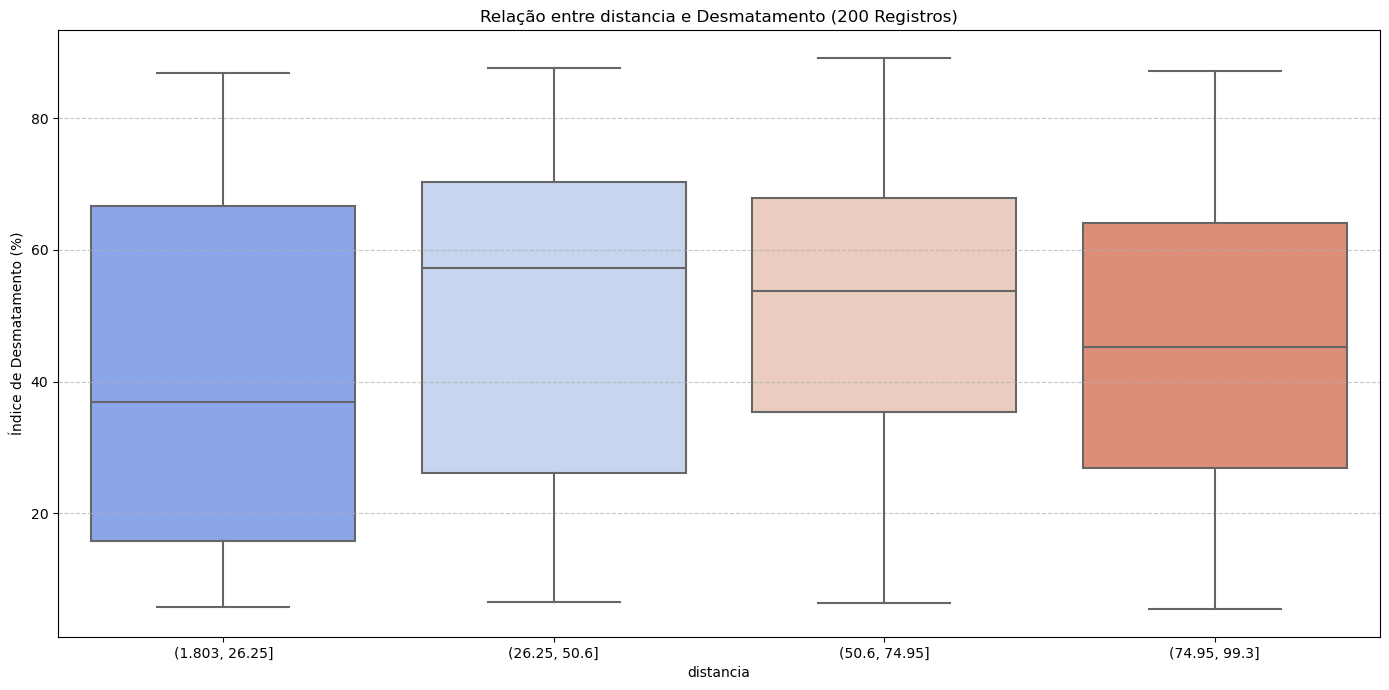

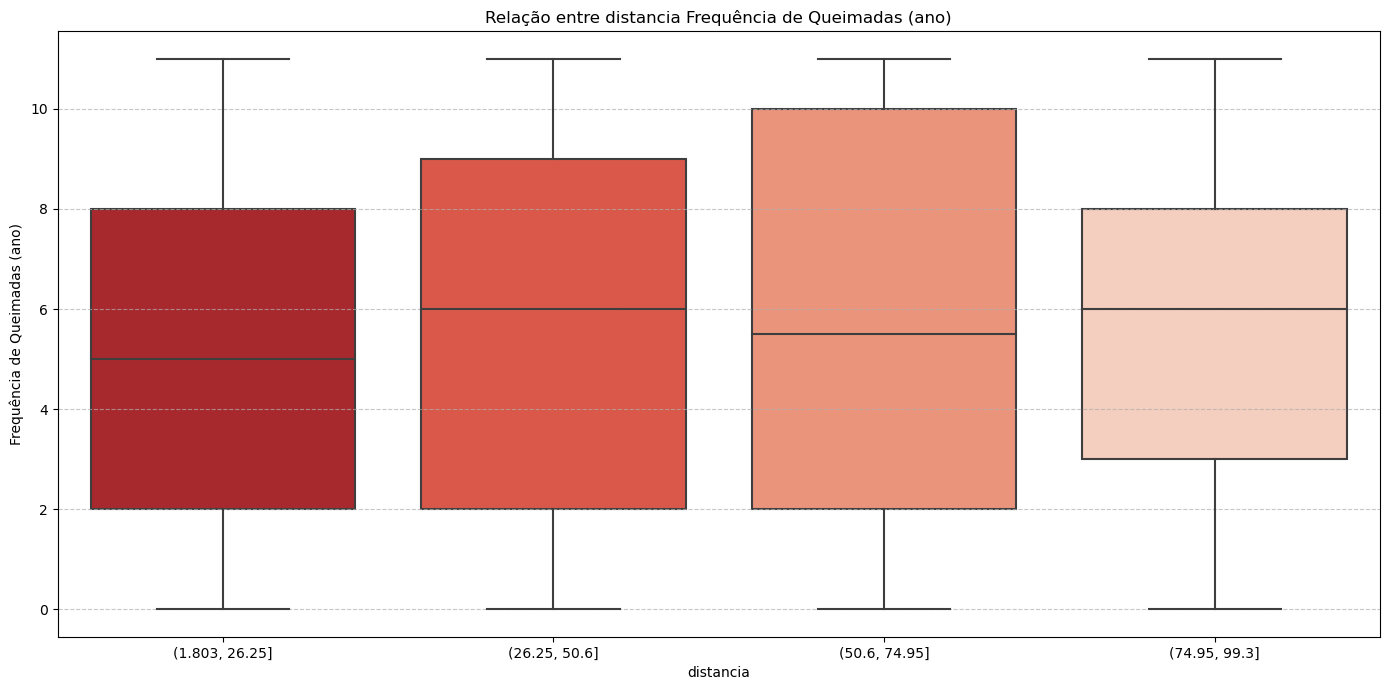

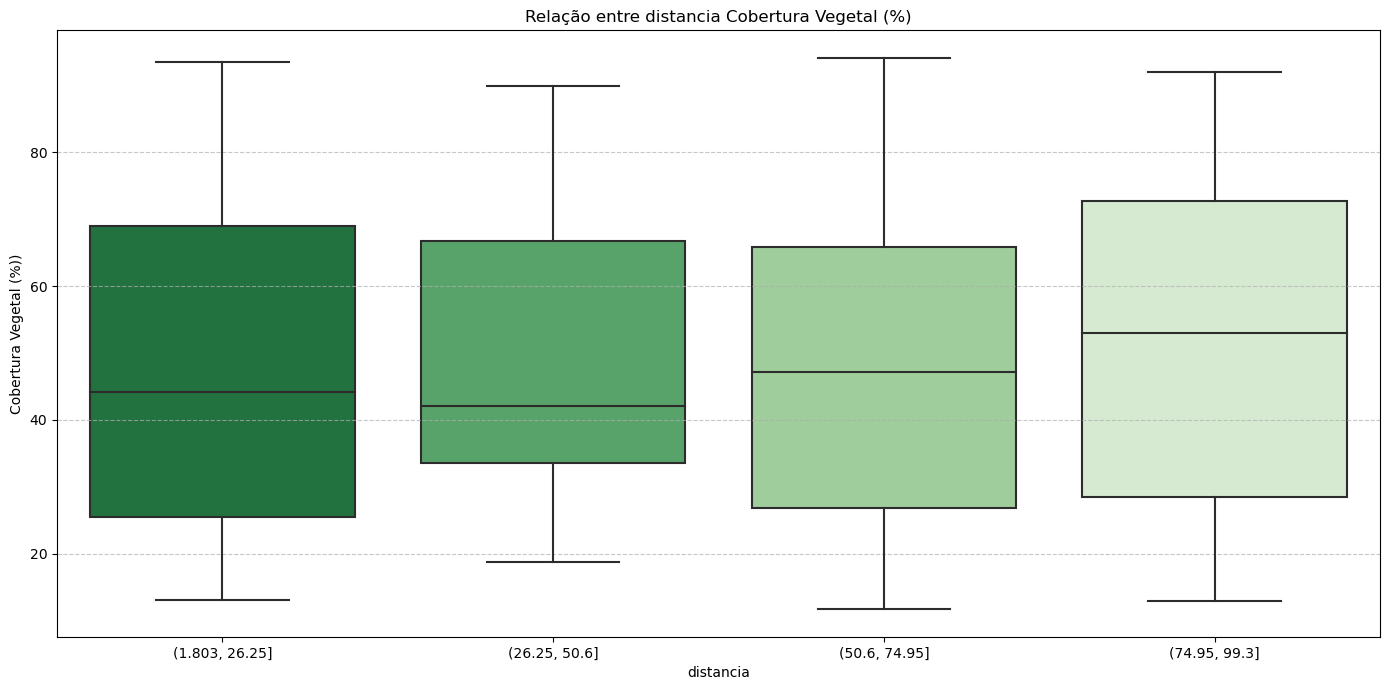

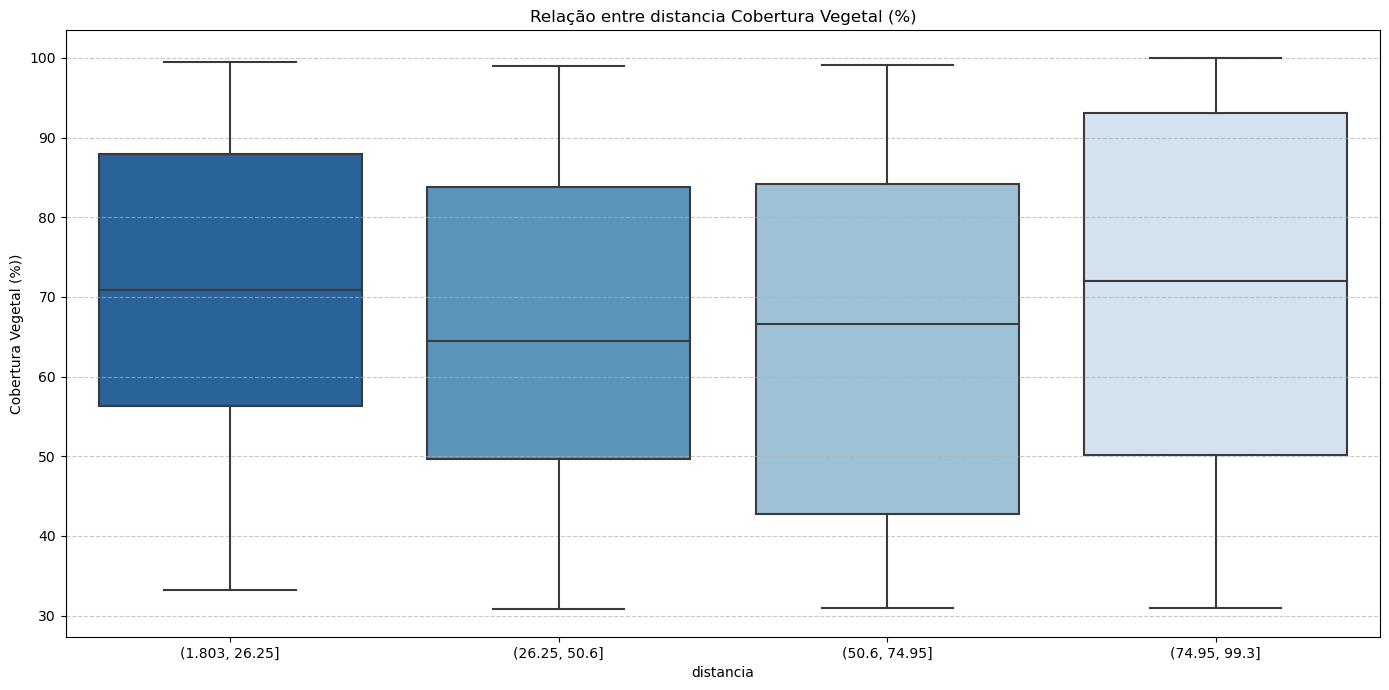

In [80]:
df['Cobertura_Bins'] = pd.cut(df['Cobertura Vegetal (%)'], bins=5) 
df['Agua_Bins'] = pd.cut(df['Acesso à Água Potável (%)'], bins=5) 

df['Renda_Bins'] = pd.cut(df['Renda Média Mensal (R$)'], bins=20) 
df['Densidade_Bins'] = pd.cut(df['Densidade Populacional (hab/km²)'], bins=20) 
df['Queimadas_Bins'] = pd.cut(df['Frequência de Queimadas (ano)'], bins=11) 

df['Distancia_Bins'] = pd.cut(df['Distância de Área Urbana (km)'], bins=4) 

#df['Desmatamento_Bins'] = pd.cut(df['Índice de Desmatamento (%)'], bins=10) 


# plt.figure(figsize=(14, 7))
# sns.boxplot(
#     data=df,
#     x='Cobertura_Bins',
#     y='Índice de Desmatamento (%)',
#     palette='Set3',
#     showfliers=False  # Oculta outliers para focar nas caixas
# )
# plt.title('Relação entre Cobertura Vegetal e Desmatamento (200 Registros)')
# plt.xlabel('Faixas de Cobertura Vegetal (%)')
# plt.ylabel('Índice de Desmatamento (%)')
# plt.xticks(rotation=45, ha='right')  # Alinhamento dos rótulos
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()




# # Plot
# plt.figure(figsize=(14, 7))
# sns.boxplot(
#     data=df,
#     x='Agua_Bins',
#     y='Índice de Desmatamento (%)',
#     palette='Set3',
#     showfliers=False  # Oculta outliers para focar nas caixas
# )
# plt.title('Relação entre Acesso à Água Potável e Desmatamento (200 Registros)')
# plt.xlabel('Faixas de Acesso à Água Potável (%)')
# plt.ylabel('Índice de Desmatamento (%)')
# plt.xticks(ha='right')  # Alinhamento dos rótulos
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()


# # Plot
# plt.figure(figsize=(14, 7))
# sns.boxplot(
#     data=df,
#     x='Queimadas_Bins',
#     y='Índice de Desmatamento (%)',
#     palette='Set3',
#     showfliers=False  # Oculta outliers para focar nas caixas
# )
# plt.title('Relação entre Frequência de Queimadas e Desmatamento (200 Registros)')
# plt.xlabel('Frequência de Queimadas')
# plt.ylabel('Índice de Desmatamento (%)')
# plt.xticks(rotation=45, ha='right')  # Alinhamento dos rótulos
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

#plot
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=df,
    x='Distancia_Bins',
    y='Índice de Desmatamento (%)',
    palette='coolwarm',
    showfliers=False  # Oculta outliers para focar nas caixas
)
plt.title('Relação entre distancia e Desmatamento (200 Registros)')
plt.xlabel('distancia')
plt.ylabel('Índice de Desmatamento (%)')
#plt.xticks(rotation=45, ha='right')  # Alinhamento dos rótulos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#plot
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=df,
    x='Distancia_Bins',
    y='Frequência de Queimadas (ano)',
    palette='Reds_r',
    showfliers=False  # Oculta outliers para focar nas caixas
)
plt.title('Relação entre distancia Frequência de Queimadas (ano)')
plt.xlabel('distancia')
plt.ylabel('Frequência de Queimadas (ano)')
#plt.xticks(rotation=45, ha='right')  # Alinhamento dos rótulos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 7))
sns.boxplot(
    data=df,
    x='Distancia_Bins',
    y='Cobertura Vegetal (%)',
    palette='Greens_r',
    showfliers=False  # Oculta outliers para focar nas caixas
)
plt.title('Relação entre distancia Cobertura Vegetal (%)')
plt.xlabel('distancia')
plt.ylabel('Cobertura Vegetal (%))')
#plt.xticks(rotation=45, ha='right')  # Alinhamento dos rótulos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#plot
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=df,
    x='Distancia_Bins',
    y='Acesso à Água Potável (%)',
    palette='Blues_r',
    showfliers=False  # Oculta outliers para focar nas caixas
)
plt.title('Relação entre distancia Cobertura Vegetal (%)')
plt.xlabel('distancia')
plt.ylabel('Cobertura Vegetal (%))')
#plt.xticks(rotation=45, ha='right')  # Alinhamento dos rótulos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.show()

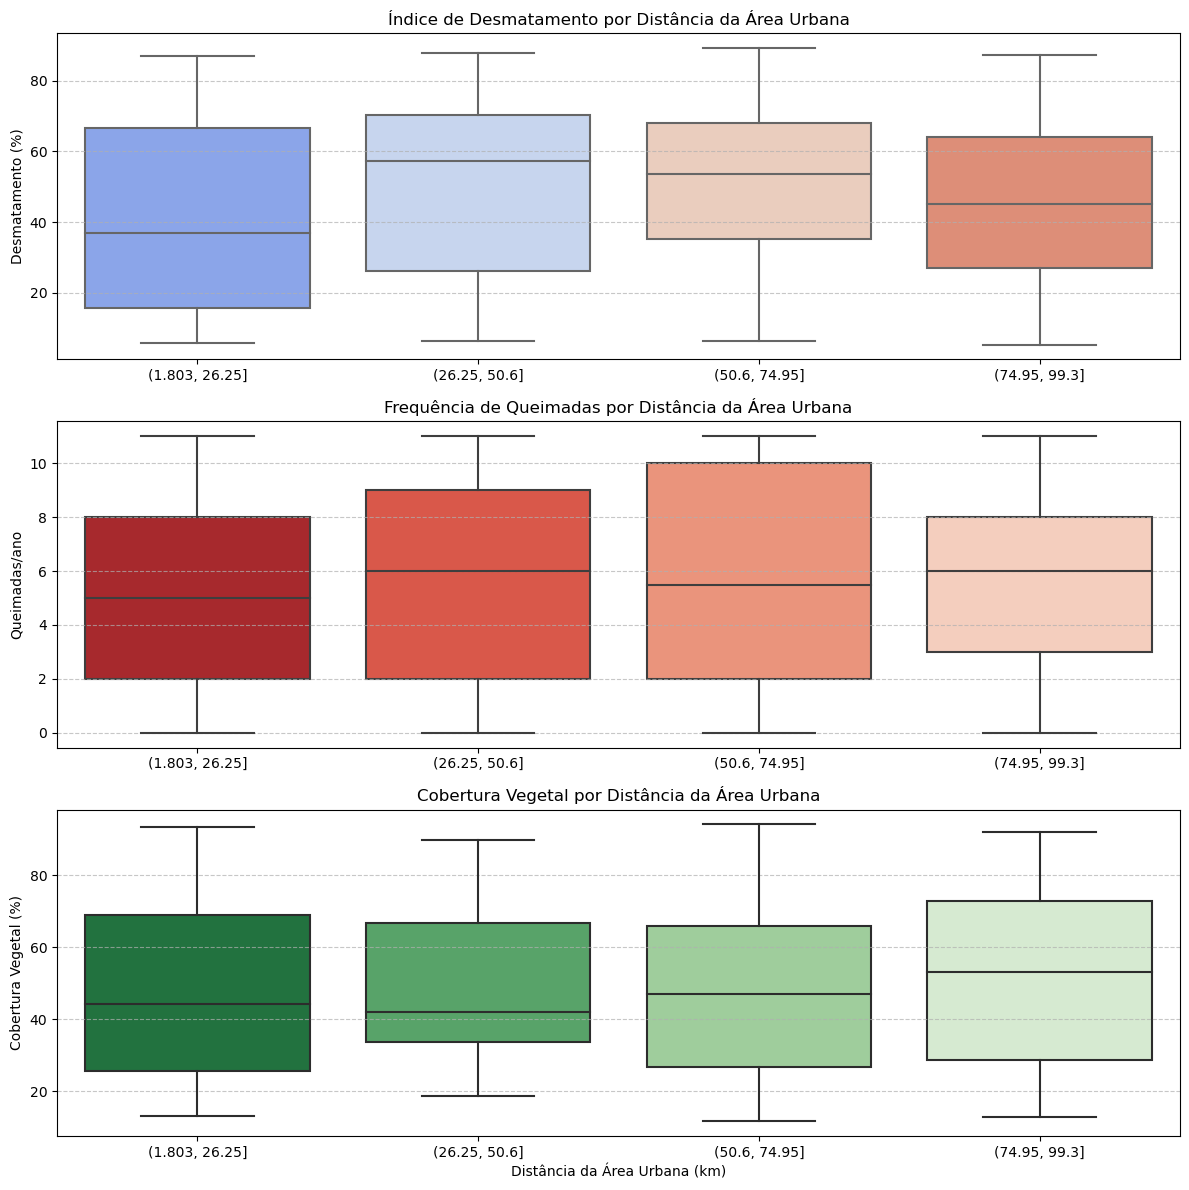

In [66]:
# Subplot com 3 gráficos (1 coluna, 3 linhas)
plt.figure(figsize=(12, 12))

# Gráfico 1 - Desmatamento
plt.subplot(3, 1, 1)
sns.boxplot(data=df, x='Distancia_Bins', y='Índice de Desmatamento (%)', 
            palette='coolwarm', showfliers=False)
plt.title('Índice de Desmatamento por Distância da Área Urbana')
plt.xlabel('')
plt.ylabel('Desmatamento (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2 - Queimadas
plt.subplot(3, 1, 2)
sns.boxplot(data=df, x='Distancia_Bins', y='Frequência de Queimadas (ano)', 
            palette='Reds_r', showfliers=False)
plt.title('Frequência de Queimadas por Distância da Área Urbana')
plt.xlabel('')
plt.ylabel('Queimadas/ano')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 3 - Cobertura Vegetal
plt.subplot(3, 1, 3)
sns.boxplot(data=df, x='Distancia_Bins', y='Cobertura Vegetal (%)', 
            palette='Greens_r', showfliers=False)
plt.title('Cobertura Vegetal por Distância da Área Urbana')
plt.xlabel('Distância da Área Urbana (km)')
plt.ylabel('Cobertura Vegetal (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('figura_subplot.png', dpi=300, bbox_inches='tight')

plt.show()

## Resumo estatistico
| Estatística | Índice de Desmatamento (%) | Acesso à Água Potável (%) | Cobertura Vegetal (%) | Renda Média Mensal (R$) | Densidade Populacional (hab/km²) | Frequência de Queimadas (ano) | Distância de Área Urbana (km) |
|-------------|-----------------------------|-----------------------------|------------------------|--------------------------|----------------------------------|-------------------------------|-------------------------------|
| count       | 200.000                     | 200.000                     | 200.000                | 200.000                  | 200.000                          | 200.000                       | 200.000                       |
| média        | **47.588**                      | **67.678**                      | **49.460**                 | **1614.530**                 | **82.470**                           | **5.670**                         | **50.147**                        |
| std         | 25.011                      | 21.345                      | 23.479                 | 746.033                  | 44.554                           | 3.653                         | 26.717                        |
| min         | 5.400                       | 30.800                      | 11.700                 | 412.000                  | 2.900                            | 0.000                         | 1.900                         |
| 25%         | 26.000                      | 51.400                      | 27.725                 | 944.750                  | 41.100                           | 2.000                         | 28.400                        |
| 50% (mediana)| 51.050                     | 68.700                      | 47.650                 | 1576.000                 | 89.750                           | 6.000                         | 51.800                        |
| 75%         | 67.550                      | 86.925                      | 69.400                 | 2195.250                 | 123.125                          | 9.000                         | 68.950                        |
| max         | 89.200                      | 100.000                     | 94.100                 | 2992.000                 | 149.700                          | 11.000                        | 99.300                        |



## hightligth

##  Índice de Desmatamento (%)
- **Média**: 47,6%  
- **Mediana**: 51,05%  
- **Interpretação**:  
  - Alta taxa de desmatamento@
  - Metade das comunidades tem mais de 50% do território desmatado.
  - **Vulnerabilidade ambiental significativa**.

---

## Acesso à Água Potável (%)
- **Média**: 67,7%  
- **Mediana**: 68,7%  
- **1º Quartil (25%)**: 51,4%  
- **Interpretação**:  
  - Apesar da média razoável, 25% das comunidades têm menos de 51,4% de acesso.
  - **Desigualdade grave em infraestrutura básica**.

---

##  Cobertura Vegetal (%)
- **Média**: 49,5%  
- **Mediana**: 47,65%  
- **Interpretação**:  
  - Distribuição equilibrada.
  - Indica **fragmentação territorial** entre áreas degradadas e preservadas.

---

## Renda Média Mensal (R$)
- **Média**: R$ 1614,53  
- **Mediana**: R$ 1576,00  
- **Desvio Padrão**: R$ 746,03  
- **Intervalo**: R$ 412 – R$ 2992  
- **Interpretação**:  
  - **Alta desigualdade de renda** entre comunidades.
  - Presença de regiões com renda extremamente baixa.

---

##  Densidade Populacional (hab/km²)
- **Média**: 82,5  
- **Mediana**: 89,8  
- **Intervalo**: 2,9 – 149,7  
- **Interpretação**:  
  - Grande dispersão populacional.
  - Diferença marcante entre áreas urbanas e remotas.

---

##  Frequência de Queimadas (ano)
- **Média**: 5,67  
- **Mediana**: 6,00  
- **Máximo**: 11  
- **Interpretação**:  
  - Queimadas frequentes indicam **risco ambiental recorrente**.
  - Preocupante em áreas já desmatadas ou com baixa cobertura vegetal.

---

## Distância de Área Urbana (km)
- **Média**: 50,1 km  
- **Mediana**: 51,8 km  
- **Interpretação**:  
  - Muitas comunidades estão **distantes de centros urbanos**.
  - Indica **isolamento territorial** e **dificuldade de acesso a serviços essenciais**.


# outros pontos

### Desigualdades
- **Sociais**: acesso à água e renda variam muito entre as comunidades.
- **Territoriais**: disparidades no acesso à infraestrutura e presença de centros urbanos.

###  Vulnerabilidades Territoriais
- Alta exposição a queimadas e desmatamento.
- Isolamento geográfico dificulta acesso a políticas públicas e serviços básicos.

###  Padrão Médio
- As médias **não representam bem** toda a população devido à alta dispersão dos dados.
- A **mediana é um indicador mais confiável** em muitos casos.

---

## Ponto de atenção

A alta variabilidade em todos os indicadores sugere que as condições podem ser muito diferentes entre as 200 localidades analisadas, reforçando a necessidade de análises mais detalhadas e espacializadas para identificar as áreas mais críticas e direcionar intervenções eficazes. A combinação de desmatamento elevado, baixa cobertura vegetal e acesso limitado à água potável em certas áreas pode indicar vulnerabilidades complexas e interconectadas.

In [50]:
# filtragem
#Distância de Área Urbana (km)
df_20=df[df['Distância de Área Urbana (km)']<20]



df_50=df[(df['Distância de Área Urbana (km)']>=20) & (df['Distância de Área Urbana (km)']<50)]
df_70=df[(df['Distância de Área Urbana (km)']>=50) & (df['Distância de Área Urbana (km)']<70)]
df_71=df[df['Distância de Área Urbana (km)']>=70]


# #df_filtro100=df[df['idade']>100]
# print(' Distância de Área Urbana < 20km')
# display(df_20.describe())
# print(' Distância de Área Urbana  20km-50km')
# display(df_50.describe())
# print(' Distância de Área Urbana 50-70 km')
# display(df_70.describe())
# print(' Distância de Área Urbana > 70km')
# display(df_71.describe())

print(' Distância de Área Urbana < 20km')
print(df_20['Presença de Escola (Sim/Não)'].value_counts()/len(df_20)*100)
print(df_20['Presença de Unidade de Saúde (Sim/Não)'].value_counts()/len(df_20)*100)
display(df_20.describe())
print('\n')

print(' Distância de Área Urbana  20km-50km')
print(df_50['Presença de Escola (Sim/Não)'].value_counts()/len(df_50)*100)
print(df_50['Presença de Unidade de Saúde (Sim/Não)'].value_counts()/len(df_50)*100)
display(df_50.describe())
print('\n')

print(' Distância de Área Urbana  50km-70km')
print(df_70['Presença de Escola (Sim/Não)'].value_counts()/len(df_70)*100)
print(df_70['Presença de Unidade de Saúde (Sim/Não)'].value_counts()/len(df_70)*100)
display(df_70.describe())
print('\n')

print(' Distância de Área Urbana > 70 km')
print(df_71['Presença de Escola (Sim/Não)'].value_counts()/len(df_71)*100)
print(df_71['Presença de Unidade de Saúde (Sim/Não)'].value_counts()/len(df_71)*100)
display(df_71.describe())




 Distância de Área Urbana < 20km
Presença de Escola (Sim/Não)
Sim    77.142857
Não    22.857143
Name: count, dtype: float64
Presença de Unidade de Saúde (Sim/Não)
Sim    60.0
Não    40.0
Name: count, dtype: float64


,Índice de Desmatamento (%),Acesso à Água Potável (%),Cobertura Vegetal (%),Renda Média Mensal (R$),Densidade Populacional (hab/km²),Frequência de Queimadas (ano),Distância de Área Urbana (km),Latitude,Longitude
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,42.065714,71.557143,51.442857,1592.457143,77.554286,5.800000,11.191429,-2.524746,-49.236731
std,27.168320,19.662764,24.492848,730.495011,46.317620,3.402421,5.486742,1.796714,2.251188
min,5.800000,35.100000,13.500000,434.000000,2.900000,0.000000,1.900000,-7.099851,-55.328079
25%,14.950000,56.150000,35.150000,959.000000,41.800000,3.000000,6.950000,-3.534865,-49.896661
50%,36.900000,70.900000,49.200000,1715.000000,68.000000,6.000000,11.800000,-1.718288,-48.563014
75%,60.050000,88.800000,73.050000,2051.500000,124.100000,9.000000,16.150000,-1.352539,-47.589669
max,86.900000,99.500000,93.500000,2899.000000,149.200000,11.000000,19.600000,-0.722033,-46.763523




 Distância de Área Urbana  20km-50km
Presença de Escola (Sim/Não)
Sim    70.967742
Não    29.032258
Name: count, dtype: float64
Presença de Unidade de Saúde (Sim/Não)
Sim    53.225806
Não    46.774194
Name: count, dtype: float64


,Índice de Desmatamento (%),Acesso à Água Potável (%),Cobertura Vegetal (%),Renda Média Mensal (R$),Densidade Populacional (hab/km²),Frequência de Queimadas (ano),Distância de Área Urbana (km),Latitude,Longitude
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,48.445161,67.235484,47.851613,1644.758065,85.182258,5.387097,35.845161,-2.990322,-49.738537
std,25.990286,20.709751,22.496716,679.217165,43.265526,3.730050,8.320795,2.343230,2.520640
min,6.500000,30.800000,13.100000,429.000000,7.500000,0.000000,20.300000,-8.871016,-55.868285
25%,26.450000,53.400000,29.825000,1078.000000,40.675000,2.000000,29.225000,-4.101431,-51.438069
50%,52.200000,65.700000,41.700000,1657.500000,94.400000,5.500000,38.000000,-1.917302,-49.241789
75%,72.050000,86.850000,66.150000,2144.500000,119.025000,8.750000,42.125000,-1.227108,-47.928055
max,87.700000,99.000000,92.400000,2836.000000,148.700000,11.000000,49.800000,-0.625928,-46.544695




 Distância de Área Urbana  50km-70km
Presença de Escola (Sim/Não)
Sim    79.62963
Não    20.37037
Name: count, dtype: float64
Presença de Unidade de Saúde (Sim/Não)
Sim    61.111111
Não    38.888889
Name: count, dtype: float64


,Índice de Desmatamento (%),Acesso à Água Potável (%),Cobertura Vegetal (%),Renda Média Mensal (R$),Densidade Populacional (hab/km²),Frequência de Queimadas (ano),Distância de Área Urbana (km),Latitude,Longitude
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,52.322222,64.261111,49.472222,1438.907407,78.751852,5.759259,59.722222,-3.281415,-49.218945
std,22.703459,20.856522,22.936947,733.287049,46.031465,3.884829,5.097453,2.521502,2.178426
min,6.300000,32.000000,11.700000,412.000000,4.600000,0.000000,50.500000,-8.871016,-56.090098
25%,35.900000,43.625000,28.375000,791.250000,38.100000,2.000000,55.075000,-4.696874,-49.890328
50%,54.400000,66.650000,49.800000,1476.000000,82.650000,5.000000,59.900000,-1.969955,-48.717233
75%,67.200000,83.150000,64.525000,1951.750000,119.750000,10.000000,64.200000,-1.228146,-47.591566
max,89.200000,99.100000,93.900000,2794.000000,148.200000,11.000000,69.100000,-0.663749,-46.903082




 Distância de Área Urbana > 70 km
Presença de Escola (Sim/Não)
Sim    83.673469
Não    16.326531
Name: count, dtype: float64
Presença de Unidade de Saúde (Sim/Não)
Sim    65.306122
Não    34.693878
Name: count, dtype: float64


,Índice de Desmatamento (%),Acesso à Água Potável (%),Cobertura Vegetal (%),Renda Média Mensal (R$),Densidade Populacional (hab/km²),Frequência de Queimadas (ano),Distância de Área Urbana (km),Latitude,Longitude
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,45.230612,69.232653,50.063265,1785.591837,86.644898,5.836735,85.514286,-2.912035,-50.082393
std,24.269401,23.723664,25.097590,826.640110,43.945995,3.555201,8.391936,2.209390,2.800111
min,5.400000,30.900000,12.900000,469.000000,5.600000,0.000000,70.800000,-9.334833,-55.868285
25%,26.300000,49.400000,24.700000,1097.000000,45.900000,3.000000,77.800000,-3.838100,-50.639925
50%,45.300000,71.600000,52.700000,1576.000000,95.800000,6.000000,85.900000,-1.938712,-49.497885
75%,64.200000,92.100000,73.000000,2571.000000,124.100000,9.000000,92.600000,-1.128244,-47.910861
max,87.900000,100.000000,94.100000,2992.000000,149.700000,11.000000,99.300000,-0.625928,-47.004932


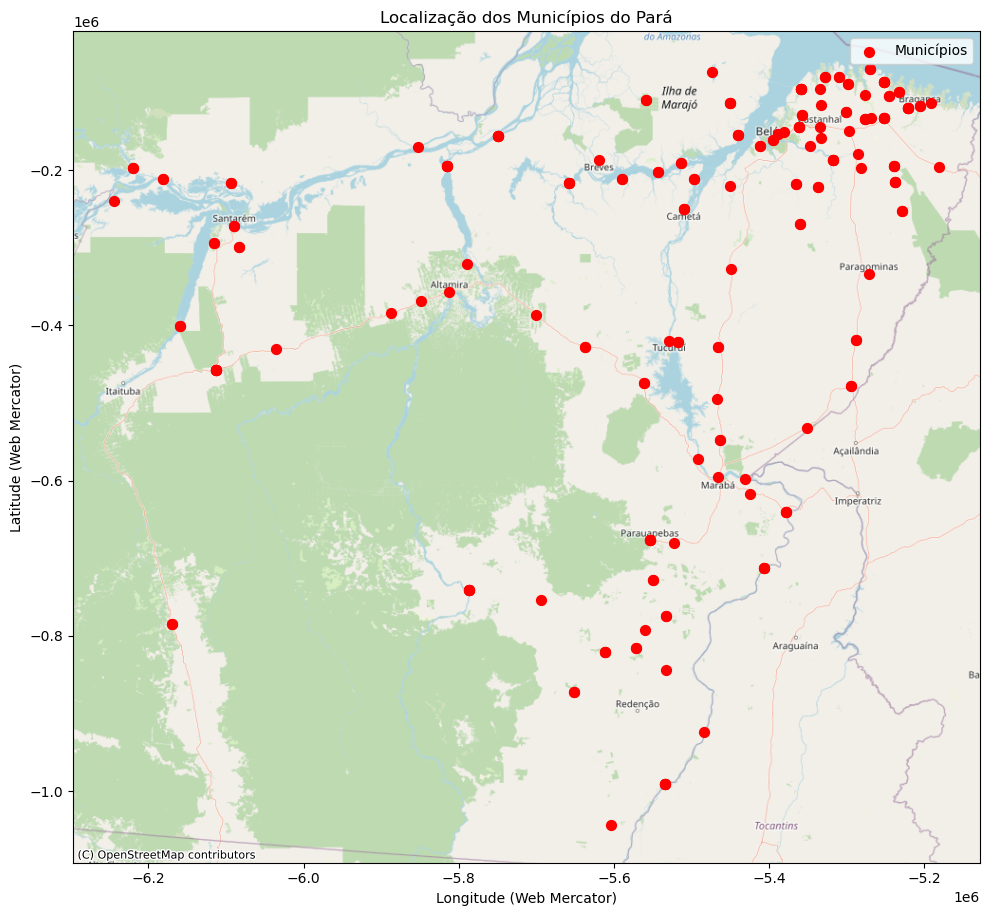

In [103]:

geometry = [Point(lon, lat) for lat, lon in zip(df['Latitude'], df['Longitude'])]
gdf_municipios = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_municipios_web_mercator = gdf_municipios.to_crs(epsg=3857)

# Plotar os municípios
gdf_municipios_web_mercator.plot(ax=ax, marker='o', color='red', markersize=50, label='Municípios')

# Adicionar o mapa base do OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Definir os rótulos dos eixos e o título
ax.set_xlabel("Longitude (Web Mercator)")
ax.set_ylabel("Latitude (Web Mercator)")
ax.set_title("Localização dos Municípios do Pará")
ax.legend(loc='upper right')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [92]:
# Seu DataFrame com municípios, latitude, longitude e Cobertura Vegetal (%)
data = {'Município': ['Belém', 'Ananindeua', 'Santarém', 'Marabá', 'Parauapebas', 'Altamira'],
        'Latitude': [-1.4558, -1.3644, -2.4431, -5.3628, -6.0719, -3.2039],
        'Longitude': [-48.5044, -48.3769, -54.7097, -49.1206, -50.0167, -52.2069],
        'Cobertura Vegetal (%)': [70, 75, 60, 55, 50, 45]}
dat1 = pd.DataFrame(data)

#df= pd.read_csv("Dataset_de_200_Comunidades_para_Analise_Ambiental2.csv")

dat1 = df[['Município', 'Latitude','Longitude','Cobertura Vegetal (%)']]

# Criar um mapa centrado no Pará (usando a média das latitudes e longitudes como centro aproximado)
para_center_lat = dat1['Latitude'].mean()
para_center_lon = dat1['Longitude'].mean()
m = folium.Map(location=[para_center_lat, para_center_lon], zoom_start=6.4)

# Adicionar marcadores com cor baseada na Cobertura Vegetal (%)
for index, row in dat1.iterrows():
    municipio = row['Município']
    latitude = row['Latitude']
    longitude = row['Longitude']
    cobertura = row['Cobertura Vegetal (%)']

    # Definir a cor do marcador com base na cobertura vegetal
    color = 'red'  # Cobertura baixa
    if cobertura > 50:
        color = 'orange'  # Cobertura média
    if cobertura > 70:
        color = 'green'   # Cobertura alta

    folium.CircleMarker(
        location=[latitude, longitude],
        radius=8,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{municipio}: {cobertura}% de Cobertura Vegetal"
    ).add_to(m)


# --- Adicionar Legenda ---
# HTML para a legenda
legend_html = """
     <div style="
     position: fixed;
     bottom: 50px; left: 50px; width: 200px; height: 110px;
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;
     opacity:0.9;
     ">
       <div style="padding: 10px;">
         <b>Cobertura Vegeral</b> <br>
         <i style="background:red; width: 10px; height: 10px; display: inline-block;"></i> < 50% <br>
         <i style="background:orange; width: 10px; height: 10px; display: inline-block;"></i> 50-70% <br>
         <i style="background:green; width: 10px; height: 10px; display: inline-block;"></i> > 70% <br>
       </div>
     </div>
     """

# Adicionar a legenda ao mapa
m.get_root().html.add_child(folium.Element(legend_html))

# Adicionar controle de medida
m.add_child(MeasureControl())

m





    
m

In [79]:
dat1=[]
dat1 = df[['Município', 'Latitude','Longitude','Frequência de Queimadas (ano)']]
from folium.plugins import MeasureControl

# Criar um mapa centrado no Pará (usando a média das latitudes e longitudes como centro aproximado)
para_center_lat = dat1['Latitude'].mean()
para_center_lon = dat1['Longitude'].mean()
m = folium.Map(location=[para_center_lat, para_center_lon], zoom_start=6.4)

# Adicionar marcadores com cor baseada na Cobertura Vegetal (%)
for index, row in dat1.iterrows():
    municipio = row['Município']
    latitude = row['Latitude']
    longitude = row['Longitude']
    queimadas= row['Frequência de Queimadas (ano)']

    color = 'green'  # 
    if queimadas > 2:
        color = 'yellow'  # 
    if queimadas > 5:
        color = 'orange'
    if queimadas >= 8:
        color = 'red'   

    folium.CircleMarker(
        location=[latitude, longitude],
        radius=8,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{municipio}: {queimadas} queimadas ao ano"
    ).add_to(m)
# --- Adicionar Legenda ---
# HTML para a legenda
legend_html = """
     <div style="
     position: fixed;
     bottom: 50px; left: 50px; width: 200px; height: 140px;
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;
     opacity:0.9;
     ">
       <div style="padding: 10px;">
         <b>Legenda de Frequência de Queimadas</b> <br>
         <i style="background:red; width: 10px; height: 10px; display: inline-block;"></i> >= 8 ao ano <br>
         <i style="background:orange; width: 10px; height: 10px; display: inline-block;"></i> > 5 ao ano <br>
         <i style="background:yellow; width: 10px; height: 10px; display: inline-block;"></i> > 2 ao ano <br>
         <i style="background:green; width: 10px; height: 10px; display: inline-block;"></i> <= 2 ao ano <br>
       </div>
     </div>
     """

# Adicionar a legenda ao mapa
m.get_root().html.add_child(folium.Element(legend_html))

# Adicionar controle de medida
m.add_child(MeasureControl())

m


In [98]:
# filtragem cobertura vegetal
#Distância de Área Urbana (km)
dfc_20=df[df['Cobertura Vegetal (%)']<20]
dfc_50=df[(df['Cobertura Vegetal (%)']>=20) & (df['Cobertura Vegetal (%)']<50)]
dfc_70=df[(df['Cobertura Vegetal (%)']>=50) & (df['Cobertura Vegetal (%)']<75)]
dfc_75=df[df['Cobertura Vegetal (%)']>=75]
dfc_20

,Comunidade,Município,Estado,Índice de Desmatamento (%),Acesso à Água Potável (%),Cobertura Vegetal (%),Renda Média Mensal (R$),Densidade Populacional (hab/km²),Frequência de Queimadas (ano),Distância de Área Urbana (km),Presença de Escola (Sim/Não),Presença de Unidade de Saúde (Sim/Não),Latitude,Longitude
10,Comunidade 11,XINGUARA,Pará,71.3,82.8,13.5,2798.0,68.0,10,9.1,Sim,Sim,-7.099851,-49.941663
14,Comunidade 15,CAPANEMA,Pará,81.4,87.9,17.5,1977.0,110.4,3,21.2,Sim,Sim,-1.193305,-47.182868
21,Comunidade 22,SÃO DOMINGOS DO ARAGUAIA,Pará,51.6,52.4,13.3,2961.0,34.7,0,73.8,Não,Não,-5.541278,-48.730002
24,Comunidade 25,CURRALINHO,Pará,24.1,70.1,16.9,2794.0,7.8,10,54.8,Sim,Sim,-1.813788,-49.798017
27,Comunidade 28,SÃO SEBASTIÃO DA BOA VISTA,Pará,32.7,50.5,15.2,1937.0,28.7,9,3.9,Sim,Não,-1.718288,-49.531996
39,Comunidade 40,SAPUCAIA,Pará,80.8,54.6,13.1,2318.0,49.2,3,24.3,Não,Não,-6.941101,-49.699133
45,Comunidade 46,PRIMAVERA,Pará,21.6,35.9,19.1,1696.0,13.4,11,51.7,Sim,Sim,-0.940652,-47.116728
51,Comunidade 52,SÃO FÉLIX DO XINGU,Pará,84.9,35.9,11.7,434.0,81.8,3,59.7,Sim,Não,-6.638697,-51.978758
61,Comunidade 62,SANTA CRUZ DO ARARI,Pará,30.0,84.4,17.4,574.0,131.5,5,60.3,Sim,Sim,-0.663749,-49.172932
75,Comunidade 76,LIMOEIRO DO AJURU,Pará,79.6,97.4,18.7,1442.0,64.4,4,36.6,Sim,Sim,-1.895893,-49.382838


In [97]:
corr_matrix = dfc_20.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

ValueError: could not convert string to float: 'Comunidade 11'